# Exploratory Data Analysis: Sales Promoter Resignation Analysis

- Understanding the Problem statement
- Data Collection
- Data Checks to perform
- Data Pre-Processing
- Exploratory data analysis
- Conclusions

---

## 1) Problem Statement and Business Context
A microfinance company trains new sales promoters through a 6-month induction course. However, some promoters resign after this period, leading to operational costs and talent loss.

**Objective**: Analyze provided data to identify turnover patterns ("NC" = resigned post-training, "C" = continued) and propose strategies to reduce this resignation rate.

---

## 2) Data Collection

**Records**: 17,384 employees across 3 related tables  
**Key Variables**:
- Demographic data (gender, age, education, marital status, children)
- Work experience (previous jobs, tenure)
- Employment details (branch, sales performance, salary, resign status)

**Expected Outcomes**
- Identification of key factors influencing resignation
- Recommendations for retention strategies
- Insights to improve the training program

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Import the Excel Data as Pandas DataFrames

In [5]:
from pathlib import Path

# Define project root
ROOT_DIR = Path.cwd().parents[0]
DATA_PATH = ROOT_DIR / "data" / "raw" / "sales_promoter.xlsx"

demografica_df, experiencia_df, laboral_df = pd.read_excel(
    DATA_PATH,
    sheet_name=['Demografica', 'Experiencia', 'Laboral']
).values()

### 2.2 Dataset information
#### Show Top 5 Records

In [6]:
demografica_df.head()

,NUMERO_EMPLEADO,GENERO,EDAD,NUM_HIJOS,EDO_CIVIL,ESCOLARIDAD
0,F10,F,32,sin hijos,NaN,NaN
1,F100,F,40,0 a 4,NaN,NaN
2,F1000,M,36,mas de 4,NaN,NaN
3,F10000,F,26,0,NaN,NaN
4,F10001,F,28,0 a 4,NaN,NaN


#### Information and Shape of the dataset

In [7]:
demografica_df.info()
demografica_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NUMERO_EMPLEADO  17384 non-null  object
 1   GENERO           17384 non-null  object
 2   EDAD             17384 non-null  int64 
 3   NUM_HIJOS        17384 non-null  object
 4   EDO_CIVIL        1464 non-null   object
 5   ESCOLARIDAD      1464 non-null   object
dtypes: int64(1), object(5)
memory usage: 815.0+ KB


(17384, 6)

**Result**: Dataset with 17368 rows and 6 columns. The dataset contains 1 column with numerical data and 4 with categorical data.
- id = NUMERO_EMPLEADO
- Categorical = GENERO, NUM_HIJOS, EDO_CIVIL, ESCOLARIDAD
- Numerical = EDAD

#### Show Top 5 Records

In [8]:
experiencia_df.head()

,EMPLEADO,Antigüedad,NUM_TRABAJOS_PREVIOS,EXPERIENCIA
0,F10,5.0,1.332598,NaN
1,F100,NaN,NaN,NaN
2,F1000,22.0,6.123918,NaN
3,F10000,0.0,0.000000,NaN
4,F10001,11.0,2.830057,NaN


#### Information and Shape of the dataset

In [9]:
experiencia_df.info()
experiencia_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17342 entries, 0 to 17341
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EMPLEADO              17342 non-null  object 
 1   Antigüedad            15935 non-null  float64
 2   NUM_TRABAJOS_PREVIOS  15935 non-null  float64
 3   EXPERIENCIA           1459 non-null   object 
dtypes: float64(2), object(2)
memory usage: 542.1+ KB


(17342, 4)

**Result**: dataset with 17326 rows and 4 columns. The dataset contains 2 column with numerical data and 1 with categorical data.
- id = EMPLEADO
- Categorical = EXPERIENCIA
- Numerical = Antigüedad, NUM_TRABAJOS_PREVIOS

#### Show Top 5 Records

In [10]:
laboral_df.head()

,NUMERO_EMPLEADO,F_ALTA,SUCURSAL,Div,NUM_VENTAS,SUELDO_PROM,SALARIO_DIARIO_ANT,NUM_DIAS,RENUNCIO
0,F14813,2015-03-17,GUADALAJARA PATRIA,NORTE,6,1760.706810,275.0,100,N
1,F15290,2015-05-04,REFORMA,SUR,4,3055.371750,513.0,51,N
2,F4421,2013-02-11,TUXTLA GUTIERREZ,SUR,6,5413.884339,470.0,99,N
3,F14529,2015-02-23,POLANCO,SUR,16,16970.988150,93.0,262,C
4,F9819,2014-03-03,TIJUANA INDUSTRIAL,NORTE SURESTE,3,2605.083408,176.0,63,N


#### Information and Shape of the dataset

In [11]:
laboral_df.info()
laboral_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17384 entries, 0 to 17383
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NUMERO_EMPLEADO     17384 non-null  object        
 1   F_ALTA              17384 non-null  datetime64[ns]
 2   SUCURSAL            16020 non-null  object        
 3   Div                 17381 non-null  object        
 4   NUM_VENTAS          17384 non-null  int64         
 5   SUELDO_PROM         17384 non-null  float64       
 6   SALARIO_DIARIO_ANT  15975 non-null  float64       
 7   NUM_DIAS            17384 non-null  int64         
 8   RENUNCIO            17384 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.2+ MB


(17384, 9)

**Result**: dataset with 17368 rows and 9 columns. The dataset contains 4 column with numerical data,  3 with categorical data and one Timestamp
- id = NUMERO_EMPLEADO
- Categorical = SUCURSAL, Div, RENUNCIO
- Numerical = NUM_VENTAS, SUELDO_PROM, SALARIO_DIARIO_ANT, NUM_DIAS
- DateTime = F_ALTA

---

## 3) Data Checks to perform

- Check Duplicates
- Check Missing values
- Check Statistics of data sets

### 3.1 Duplicates and unnecesary data

#### Since this is a relational database and the relationships are one-to-one, we will check the uniqueness of the table ids

In [12]:
demografica_df['NUMERO_EMPLEADO'].is_unique

False

In [13]:
experiencia_df['EMPLEADO'].is_unique

False

In [14]:
laboral_df['NUMERO_EMPLEADO'].is_unique

False

#### Lets take a look at the duplicated ids

In [15]:
demografica_df[demografica_df['NUMERO_EMPLEADO'].duplicated(keep=False)]

,NUMERO_EMPLEADO,GENERO,EDAD,NUM_HIJOS,EDO_CIVIL,ESCOLARIDAD
8262,F17478,M,52,0 a 4,CASADO/ UNION LIBRE CON HIJOS,BACHILLERATO CONCLUIDO
8263,F17478,M,52,más de 4,CASADO/ UNION LIBRE CON HIJOS,BACHILLERATO CONCLUIDO
8264,F17479,M,52,0,CASADO/ UNION LIBRE CON HIJOS,BACHILLERATO CONCLUIDO
8265,F17479,M,52,más de 4,CASADO/ UNION LIBRE CON HIJOS,BACHILLERATO CONCLUIDO
8267,F17480,M,43,0,CASADO/ UNION LIBRE CON HIJOS,LICENCIATURA CONCLUIDA
8268,F17480,M,43,0,CASADO/ UNION LIBRE CON HIJOS,LICENCIATURA CONCLUIDA
8269,F17481,M,29,sin hijos,CASADO/ UNION LIBRE CON HIJOS,LICENCIATURA TRUNCA
8270,F17481,M,29,más de 4,CASADO/ UNION LIBRE CON HIJOS,LICENCIATURA TRUNCA
8271,F17482,M,30,0,CON DEPENDIENTES ECONOMICOS,BACHILLERATO CONCLUIDO
8272,F17482,M,30,0 a 4,CON DEPENDIENTES ECONOMICOS,BACHILLERATO CONCLUIDO


In [16]:
experiencia_df[experiencia_df['EMPLEADO'].duplicated(keep=False)]

,EMPLEADO,Antigüedad,NUM_TRABAJOS_PREVIOS,EXPERIENCIA
8242,F17478,34.0,6.856377,2 O MAS AÑOS EN VENTAS
8243,F17478,34.0,6.856377,2 O MAS AÑOS EN VENTAS
8244,F17479,34.0,6.534413,2 O MAS AÑOS EN VENTAS
8245,F17479,34.0,6.534413,2 O MAS AÑOS EN VENTAS
8247,F17480,20.0,6.993283,2 O MAS AÑOS EN VENTAS
8248,F17480,20.0,6.993283,2 O MAS AÑOS EN VENTAS
8249,F17481,9.0,1.716655,1 AÑO EN VENTAS
8250,F17481,9.0,1.716655,1 AÑO EN VENTAS
8251,F17482,12.0,2.209199,2 O MAS AÑOS EN VENTAS
8252,F17482,12.0,2.209199,2 O MAS AÑOS EN VENTAS


In [17]:
laboral_df[laboral_df['NUMERO_EMPLEADO'].duplicated(keep=False)].sort_values('NUMERO_EMPLEADO')

,NUMERO_EMPLEADO,F_ALTA,SUCURSAL,Div,NUM_VENTAS,SUELDO_PROM,SALARIO_DIARIO_ANT,NUM_DIAS,RENUNCIO
13598,F17478,2015-12-21,TORREON COMARCA,NORTE,10,6051.355200,264.0,119,N
2832,F17478,2015-12-21,TORREON COMARCA,NORTE,10,6051.355200,264.0,119,N
10548,F17479,2015-12-21,TORREON COMARCA,NORTE,10,6051.355200,274.0,119,N
5302,F17479,2015-12-21,TORREON COMARCA,NORTE,10,6051.355200,274.0,119,N
165,F17480,2015-12-21,TORREON COMARCA,NORTE,4,1345.051224,222.0,49,N
12655,F17480,2015-12-21,TORREON COMARCA,NORTE,4,1345.051224,222.0,49,N
14455,F17481,2015-12-21,CHAPULTEPEC,SUR,8,1562.850000,795.0,120,N
7627,F17481,2015-12-21,CHAPULTEPEC,SUR,8,1562.850000,795.0,120,N
9313,F17482,2015-12-21,LA PAZ,NORTE,5,1450.324800,109.0,49,N
14468,F17482,2015-12-21,LA PAZ,NORTE,5,1450.324800,109.0,49,N


#### **Result**: On laboral and experiencia tables, repeated rows are completely equal; on demografica we see some changes; since all entries are stored on consecutivve rows, we can assume that it was a correction to the data and we will keep the last entry.

In [18]:
demografica_df = demografica_df.drop_duplicates(subset='NUMERO_EMPLEADO', keep='last')
experiencia_df = experiencia_df.drop_duplicates(subset='EMPLEADO', keep='last')
laboral_df = laboral_df.drop_duplicates(subset='NUMERO_EMPLEADO', keep='last')

#### A quick check on more duplicated values in the datasets

In [19]:
duplicate_demografica_df = demografica_df[demografica_df.duplicated()]
duplicate_demografica_df

,NUMERO_EMPLEADO,GENERO,EDAD,NUM_HIJOS,EDO_CIVIL,ESCOLARIDAD


In [20]:
duplicate_experiencia_df = experiencia_df[experiencia_df.duplicated()]
duplicate_experiencia_df

,EMPLEADO,Antigüedad,NUM_TRABAJOS_PREVIOS,EXPERIENCIA


In [21]:
duplicate_laboral_df = laboral_df[laboral_df.duplicated()]
duplicate_laboral_df

,NUMERO_EMPLEADO,F_ALTA,SUCURSAL,Div,NUM_VENTAS,SUELDO_PROM,SALARIO_DIARIO_ANT,NUM_DIAS,RENUNCIO


#### There are no duplicates values in our datasets.

### 3.2  Check for null values or missing data

#### We start with the **demografia** dataset

In [22]:
demografica_df.isnull().sum()

NUMERO_EMPLEADO        0
GENERO                 0
EDAD                   0
NUM_HIJOS              0
EDO_CIVIL          15914
ESCOLARIDAD        15914
dtype: int64

**Result**:
- We have missing values in columns EDO_CIVIL and ESCOLARIDAD.
- As 90% of the data is missing and no meaningful information is retained, it is better to drop the columns.

In [23]:
demografica_df.drop(columns = ['EDO_CIVIL', 'ESCOLARIDAD'], inplace = True)

In [24]:
demografica_df.shape

(17368, 4)

#### Let us continue with the **experiencia** dataset

In [25]:
experiencia_df.isnull().sum()

EMPLEADO                    0
Antigüedad               1406
NUM_TRABAJOS_PREVIOS     1406
EXPERIENCIA             15877
dtype: int64

##### Are Antigüedad and NUM_TRABAJOS_PREVIOS related? (new hires might lack both).

In [26]:
both_null = experiencia_df[['Antigüedad', 'NUM_TRABAJOS_PREVIOS']].isnull().all(axis=1)
print("Rows with both columns missing:", both_null.sum())

Rows with both columns missing: 1406


**Result**:
- For EXPERIENCIA column, 90% of the data is missing and no meaningful information is retained. We can drop completely the EXPERIENCIA column.
- Around 10% of the data is missing in both Antigüedad and NUM_TRABAJOS_PREVIOS.
- All the missing values seems to be related to new hires that might lack past jobs and experience, to avoid losing data, we will input those rows as 0.
- NUM_TRABAJOS_PREVIOS should have integer values, we will round and convert to integer.

In [27]:
experiencia_df.drop(columns = ['EXPERIENCIA'], inplace = True)

In [28]:
cols_to_fill = ['Antigüedad', 'NUM_TRABAJOS_PREVIOS']
experiencia_df[cols_to_fill] = experiencia_df[cols_to_fill].fillna(0)

In [29]:
#Rounding NUM_TRABAJOS_PREVIOS
experiencia_df['NUM_TRABAJOS_PREVIOS'] = experiencia_df['NUM_TRABAJOS_PREVIOS'].round().astype(int)

In [30]:
experiencia_df.shape

(17326, 3)

#### Finally, the **laboral** dataset

In [31]:
laboral_df.isnull().sum()

NUMERO_EMPLEADO          0
F_ALTA                   0
SUCURSAL              1364
Div                      3
NUM_VENTAS               0
SUELDO_PROM              0
SALARIO_DIARIO_ANT    1408
NUM_DIAS                 0
RENUNCIO                 0
dtype: int64

**Result**:
- We have missing values on SUCURSAL and SALARIO_DIARIO_ANT
- For SUCURSAL i will change those missing values to 'Desconocido' to avoid loosing data
- Around 10% of the data is missing and the data from SALARIO_DIARIO_ANT seems to be related to NUM_TRABAJOS_PREVIOS as lack of past jobs
- Since those rows were inputed to 0, we will continue on that line here as well.
- DIV has 3 missing values so it is safe to remove them.

In [32]:
laboral_df['SUCURSAL'] = laboral_df['SUCURSAL'].fillna('desconocido')

In [33]:
# Create a mapping dictionary from experiencia_df
trabajos_previos_map = experiencia_df.set_index('EMPLEADO')['NUM_TRABAJOS_PREVIOS'].to_dict()

# Fill NaN in SALARIO_DIARIO_ANT where NUM_TRABAJOS_PREVIOS == 0
laboral_df['SALARIO_DIARIO_ANT'] = laboral_df.apply(
    lambda row: 0 if (
        pd.isna(row['SALARIO_DIARIO_ANT']) and
        trabajos_previos_map.get(row['NUMERO_EMPLEADO'], -1) == 0
    ) else row['SALARIO_DIARIO_ANT'],
    axis=1
)

In [34]:
laboral_df.isnull().sum()

NUMERO_EMPLEADO       0
F_ALTA                0
SUCURSAL              0
Div                   3
NUM_VENTAS            0
SUELDO_PROM           0
SALARIO_DIARIO_ANT    2
NUM_DIAS              0
RENUNCIO              0
dtype: int64

#### All we have left are 3 rows missing in Div and 2 in SALARIO_DIARIO_ANT, we can safely remove them

In [35]:
laboral_df.dropna(inplace=True)

In [36]:
laboral_df.shape

(17363, 9)

### 3.3 Check statistics of the datasets

#### Demografica dataset

In [37]:
demografica_df.describe()

,EDAD
count,17368.000000
mean,34.740269
std,7.808695
min,4.000000
25%,29.000000
50%,33.000000
75%,39.000000
max,67.000000


**Insight**:
- The dataset represents a relatively young population (median age=33)
- Low deviations (σ = 7.8) suggests homogeneity in age.
- Clean the min = 4 value to avoid skewing analysis.

#### Laboral dataset

In [38]:
laboral_df.describe()

,F_ALTA,NUM_VENTAS,SUELDO_PROM,SALARIO_DIARIO_ANT,NUM_DIAS
count,17363,17363.000000,17363.000000,17363.000000,17363.000000
mean,2013-12-14 23:16:12.619939072,10.486897,8002.431389,204.721592,203.568623
min,2012-01-02 00:00:00,1.000000,10.002240,0.000000,3.000000
25%,2013-02-11 00:00:00,3.000000,1793.349187,65.000000,60.000000
50%,2013-11-19 00:00:00,8.000000,5535.802242,164.000000,105.000000
75%,2014-11-03 00:00:00,17.000000,12895.853230,295.000000,217.000000
max,2015-12-21 00:00:00,49.000000,55821.376188,1209.000000,1935.000000
std,NaN,8.429928,7370.531056,188.527665,267.703640


**Insight**:
- The dataset shows right-skewed distributions
- Suspicious outliers (e.g., $10 salaries).

#### Experiencia dataset

In [39]:
experiencia_df.describe()

,Antigüedad,NUM_TRABAJOS_PREVIOS
count,17326.000000,17326.000000
mean,13.128131,3.234734
std,8.910097,2.748405
min,0.000000,0.000000
25%,7.000000,1.000000
50%,12.000000,3.000000
75%,19.000000,4.000000
max,46.000000,25.000000


**Insight**:
- The dataset shows right-skewed distributions
- Worforce is experienced (median = 13 years)
- Suspicious outliers.

---

## 4) Data preprocessing

### 4.1 Find and handle Outliers

- Check for numerical data skewness
- Check for categorical data
- Do the appropiate corrections

### Demografica dataframe

#### Check the numerical variables

In [40]:
numerical_demografica_df = ['EDAD']
demografica_df[numerical_demografica_df].describe()

,EDAD
count,17368.000000
mean,34.740269
std,7.808695
min,4.000000
25%,29.000000
50%,33.000000
75%,39.000000
max,67.000000


#### We can se a min = 4, let us correct this by filtering age > 18

In [41]:
demografica_df = demografica_df[demografica_df['EDAD'] >= 18]

#### Create histogram for numerical variables

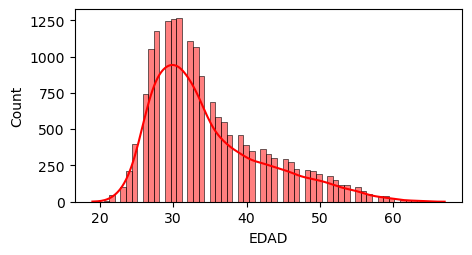

In [42]:
plt.figure(figsize=(5, 2.5))

sns.histplot(data= demografica_df, x="EDAD", kde=True, color="red")

plt.show()

#### Create boxplot to observe distribution of numerical values

<Axes: xlabel='EDAD'>

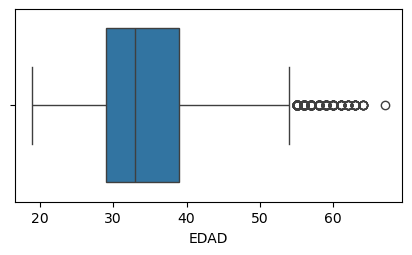

In [43]:
plt.figure(figsize=(5,2.5))
sns.boxplot(demografica_df['EDAD'], orient='h')

#### **Insights**:
- We can observe more outliers in the upper values.

#### **Actions**:
- Based on the observation of histogram and boxplot, I will consider value more than maximum as outliers. We will use the IQR rule Outliers > Q3+1.5⋅IQR

In [44]:
q25, q50, q75 = np.percentile(demografica_df['EDAD'], [25,50,75])
iqr = q75-q25
max = q75 + 1.5 * iqr

#Choose the data inside IQR
data = demografica_df[demografica_df['EDAD'] < max]

#### Check the distributions after removing outliers

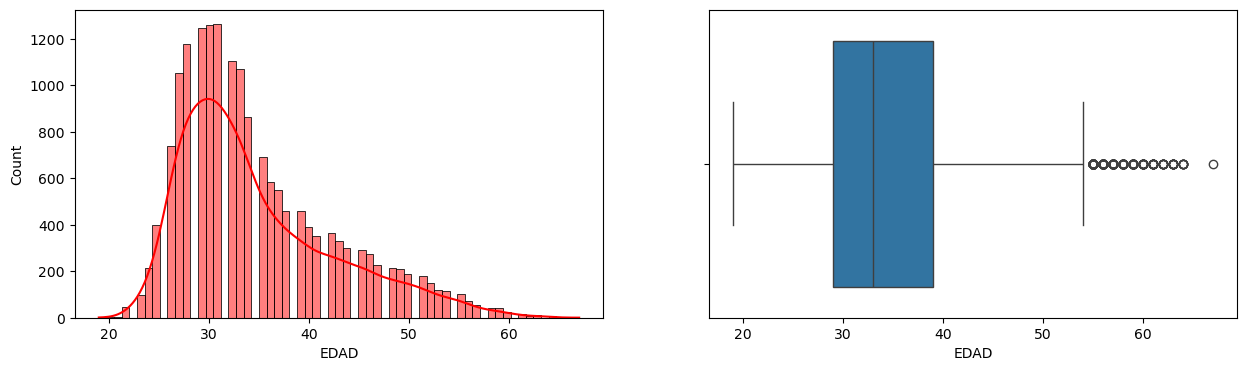

In [45]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))

sns.histplot(data= demografica_df, x="EDAD", kde=True, color="red", ax=axs[0])
sns.boxplot(demografica_df['EDAD'], orient='h', ax = axs[1])

plt.show()

#### **Result**:  
The numerical values have been removed from outliers.

#### Lets take a look on the categorical variables.

In [46]:
demografica_df['GENERO'].value_counts()

GENERO
F    9180
M    8187
Name: count, dtype: int64

In [47]:
demografica_df['NUM_HIJOS'].value_counts()

NUM_HIJOS
0 a 4        4413
sin hijos    4350
más de 4     4320
0            4283
mas de 4        1
Name: count, dtype: int64

#### **Insights**:
- GENERO looks good.
- NUM_HIJOS needs some standarization.

#### **Actions**:
- Lets standarize the categories of NUM_HIJOS.

In [48]:
# Standarize all values as strings and remove whitespace
demografica_df['NUM_HIJOS'] = demografica_df['NUM_HIJOS'].astype(str).str.strip()

demografica_df['NUM_HIJOS'] = demografica_df['NUM_HIJOS'].replace({
    'sin hijos': '0',
    '0 a 4': '1 a 4',
    'más de 4': 'mas de 4'
})

In [49]:
demografica_df['NUM_HIJOS'].value_counts()

NUM_HIJOS
0           8633
1 a 4       4413
mas de 4    4321
Name: count, dtype: int64

#### **Result**:  
The categorical values have been standarized and cleaned.

### Experiencia dataframe

#### We follow the same procedure with the numerical data. This dataframe has no categorical data

In [50]:
numerical_experiencia_df = ['Antigüedad', 'NUM_TRABAJOS_PREVIOS']
experiencia_df[numerical_experiencia_df].describe()

,Antigüedad,NUM_TRABAJOS_PREVIOS
count,17326.000000,17326.000000
mean,13.128131,3.234734
std,8.910097,2.748405
min,0.000000,0.000000
25%,7.000000,1.000000
50%,12.000000,3.000000
75%,19.000000,4.000000
max,46.000000,25.000000


#### Create histograms for numerical variables

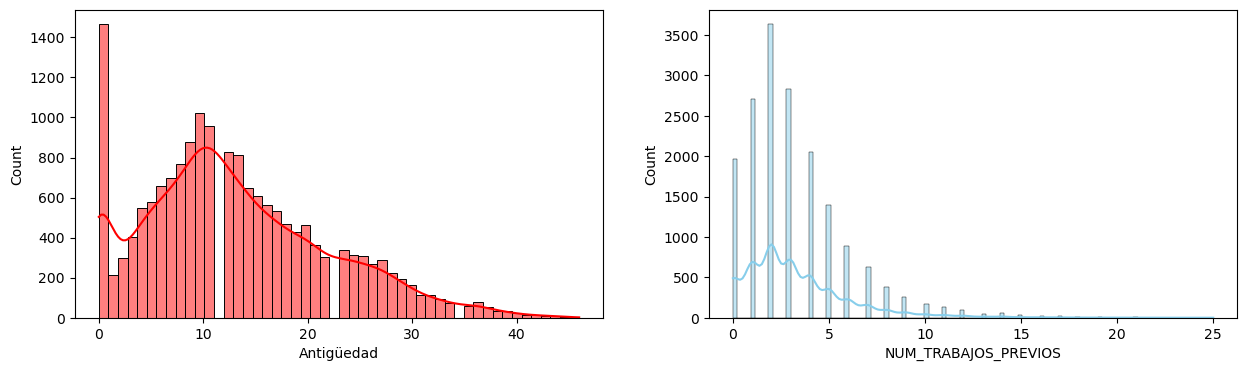

In [51]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))

sns.histplot(data = experiencia_df, x='Antigüedad', kde = True, color = "red", ax = axs[0])
sns.histplot(data= experiencia_df, x='NUM_TRABAJOS_PREVIOS', kde=True, color="skyblue", ax=axs[1])

plt.show()

#### Create boxplot to observe distribution of numerical values

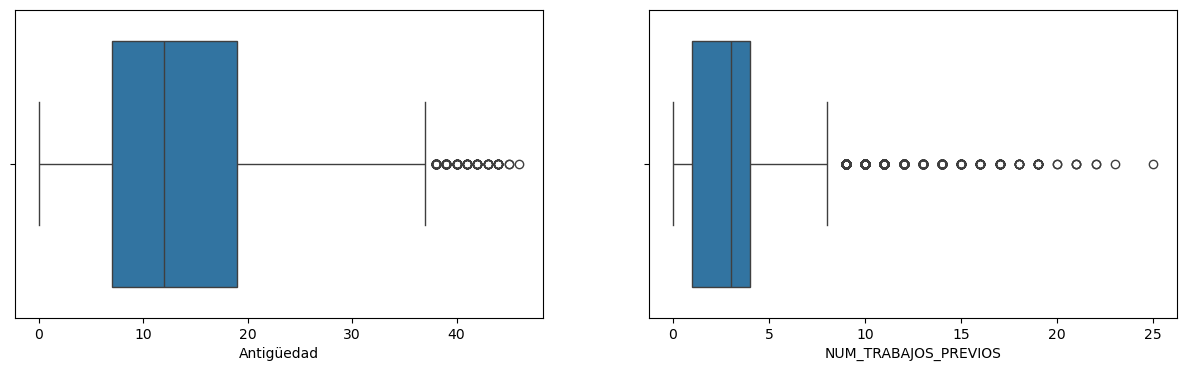

In [52]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))

sns.boxplot(experiencia_df['Antigüedad'], ax = axs[0], orient='h')
sns.boxplot(experiencia_df['NUM_TRABAJOS_PREVIOS'], ax = axs[1], orient='h')

plt.show()

#### **Insights**:
- We can observe more outliers in the upper values.

#### **Actions**:
- Based on the observation of histogram and boxplot, I will consider value more than maximum as outliers. We will use the IQR rule Outliers > Q3+1.5⋅IQR

In [53]:
columns_to_filter = ['Antigüedad', 'NUM_TRABAJOS_PREVIOS']

for column in columns_to_filter:
    q25, q50, q75 = np.percentile(experiencia_df[column], [25, 50, 75])
    iqr = q75 - q25

    max = q75 + 1.5 * iqr

    experiencia_df = experiencia_df[experiencia_df[column] <= max]

#### Check the distributions after removing outliers

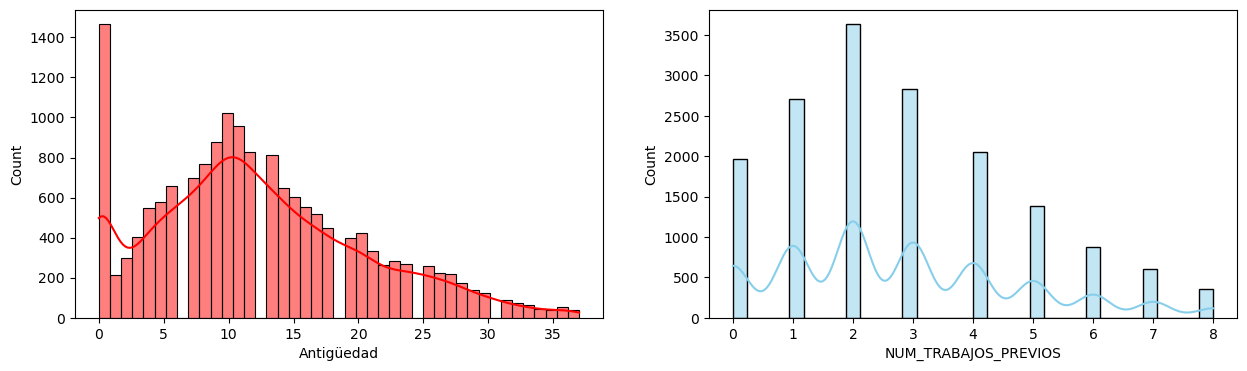

In [54]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))

sns.histplot(data = experiencia_df, x='Antigüedad', kde = True, color = "red", ax = axs[0])
sns.histplot(data= experiencia_df, x='NUM_TRABAJOS_PREVIOS', kde=True, color="skyblue", ax=axs[1])

plt.show()

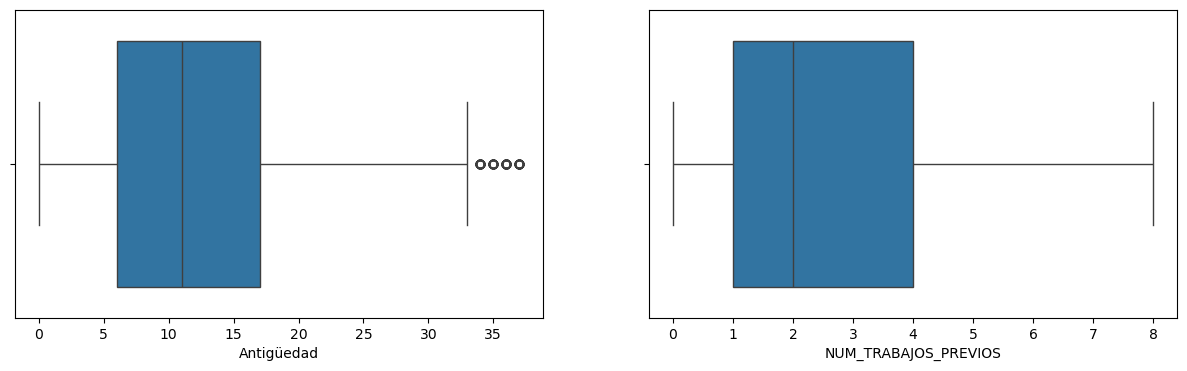

In [55]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))

sns.boxplot(experiencia_df['Antigüedad'], ax = axs[0], orient='h')
sns.boxplot(experiencia_df['NUM_TRABAJOS_PREVIOS'], ax = axs[1], orient='h')

plt.show()

#### **Result**:  
The numerical values have been removed from outliers.

### Laboral dataframe

#### We follow the same procedure with the numerical data

In [56]:
numerical_laboral_df = ['NUM_VENTAS', 'SUELDO_PROM', 'SALARIO_DIARIO_ANT', 'NUM_DIAS']
laboral_df[numerical_laboral_df].describe()

,NUM_VENTAS,SUELDO_PROM,SALARIO_DIARIO_ANT,NUM_DIAS
count,17363.000000,17363.000000,17363.000000,17363.000000
mean,10.486897,8002.431389,204.721592,203.568623
std,8.429928,7370.531056,188.527665,267.703640
min,1.000000,10.002240,0.000000,3.000000
25%,3.000000,1793.349187,65.000000,60.000000
50%,8.000000,5535.802242,164.000000,105.000000
75%,17.000000,12895.853230,295.000000,217.000000
max,49.000000,55821.376188,1209.000000,1935.000000


#### Create histograms for numerical variables

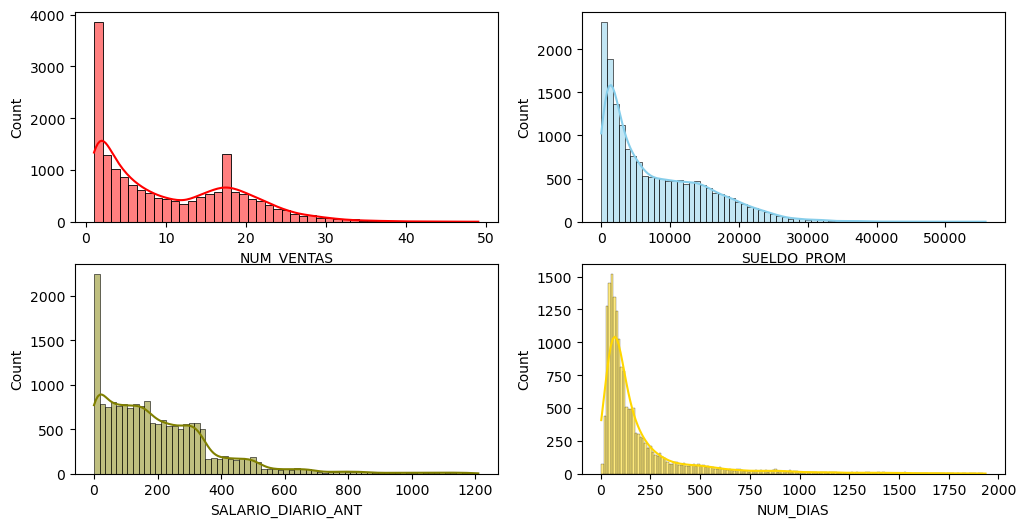

In [57]:
fig, axs = plt.subplots(2,2, figsize=(12, 6))

sns.histplot(data= laboral_df, x="NUM_VENTAS", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= laboral_df, x="SUELDO_PROM", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= laboral_df, x="SALARIO_DIARIO_ANT", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= laboral_df, x="NUM_DIAS", kde=True, color="gold", ax=axs[1,1])

plt.show()

#### Create boxplot to observe distribution of numerical values

<Axes: xlabel='NUM_DIAS'>

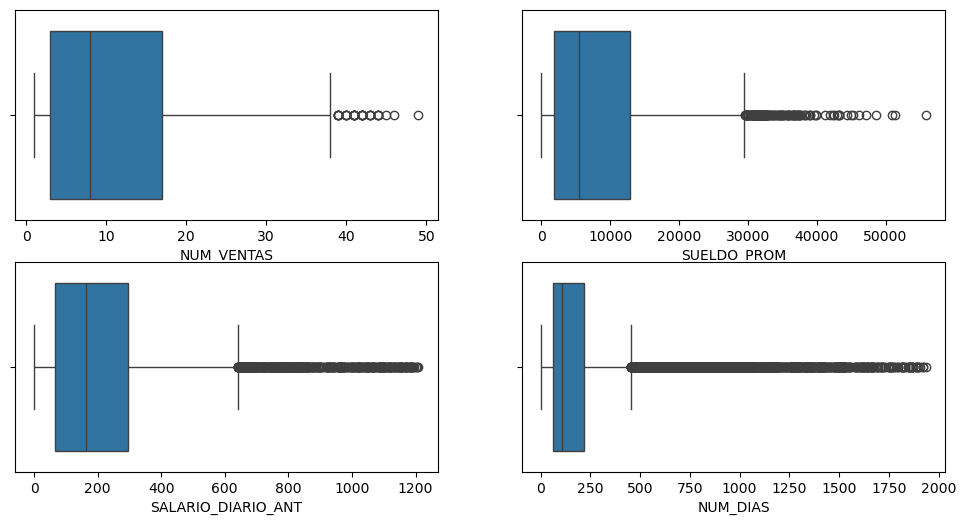

In [58]:
fig, axs = plt.subplots(2,2, figsize=(12,6))

sns.boxplot(laboral_df['NUM_VENTAS'], ax = axs[0,0], orient='h')
sns.boxplot(laboral_df['SUELDO_PROM'], ax = axs[0,1], orient='h')
sns.boxplot(laboral_df['SALARIO_DIARIO_ANT'], ax = axs[1,0], orient='h')
sns.boxplot(laboral_df['NUM_DIAS'], ax = axs[1,1], orient='h')

#### **Insights**:
- We can observe more outliers in the upper values.

#### **Actions**:
- Based on the observation of histogram and boxplot, I will consider value more than maximum as outliers. We will use the IQR rule Outliers > Q3+1.5⋅IQR

In [59]:
columns_to_filter = ['NUM_VENTAS', 'SUELDO_PROM', 'SALARIO_DIARIO_ANT', 'NUM_DIAS']

for column in columns_to_filter:
    q25, q50, q75 = np.percentile(laboral_df[column], [25, 50, 75])
    iqr = q75 - q25

    max = q75 + 1.5 * iqr

    laboral_df = laboral_df[laboral_df[column] <= max]

#### Check the distributions after removing outliers

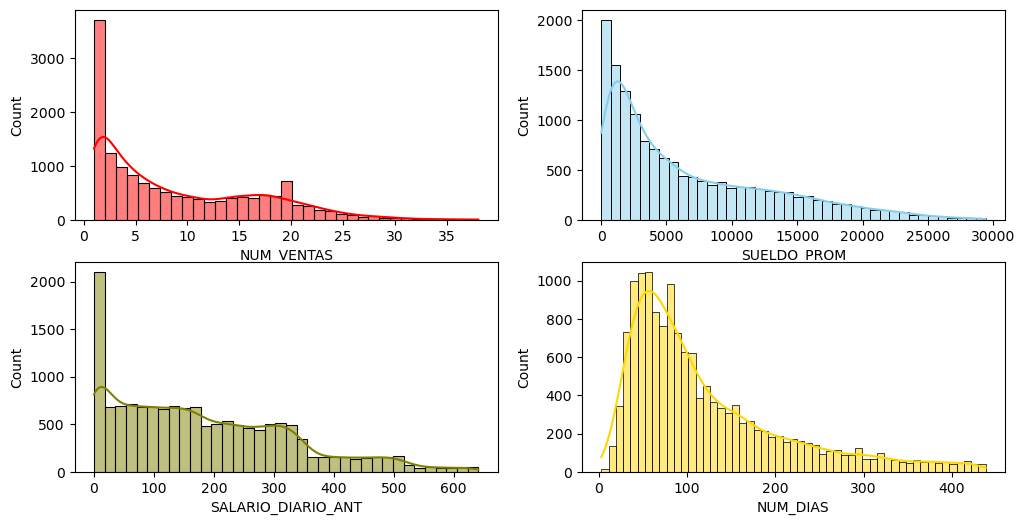

In [60]:
fig, axs = plt.subplots(2,2, figsize=(12, 6))

sns.histplot(data= laboral_df, x="NUM_VENTAS", kde=True, color="red", ax=axs[0,0])
sns.histplot(data= laboral_df, x="SUELDO_PROM", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data= laboral_df, x="SALARIO_DIARIO_ANT", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= laboral_df, x="NUM_DIAS", kde=True, color="gold", ax=axs[1,1])

plt.show()

<Axes: xlabel='NUM_DIAS'>

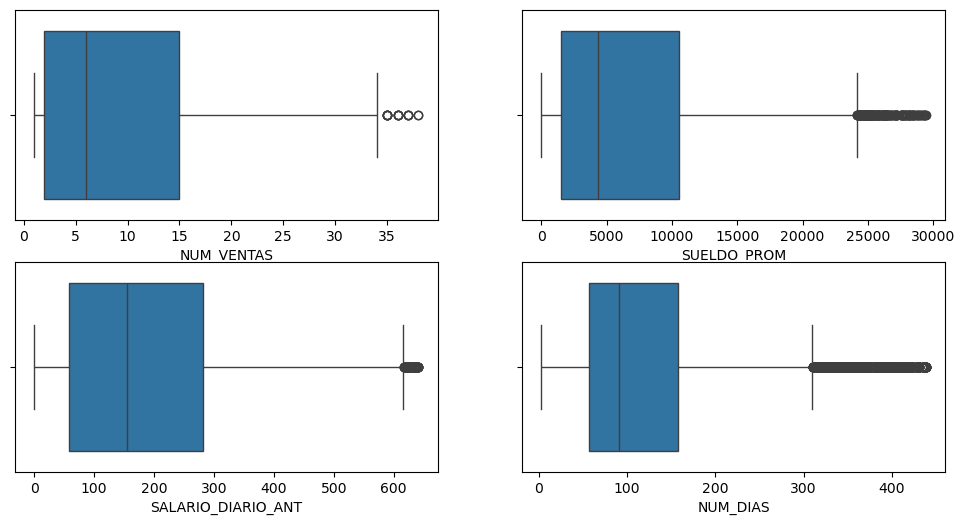

In [61]:
fig, axs = plt.subplots(2,2, figsize=(12,6))

sns.boxplot(laboral_df['NUM_VENTAS'], ax = axs[0,0], orient='h')
sns.boxplot(laboral_df['SUELDO_PROM'], ax = axs[0,1], orient='h')
sns.boxplot(laboral_df['SALARIO_DIARIO_ANT'], ax = axs[1,0], orient='h')
sns.boxplot(laboral_df['NUM_DIAS'], ax = axs[1,1], orient='h')

#### **Result**:  
The numerical values have been removed from outliers.

#### Lets take a look on the categorical variables.

In [ ]:
laboral_df['SUCURSAL'].value_counts()

SUCURSAL
desconocido             1195
CD. JUAREZ BARRANCAS     178
TIJUANA RIO              164
ARANDAS                  153
ALTAVISTA                148
                        ... 
PEDREGAL                   4
U. TEPIC                   4
U. COZUMEL                 2
PREVISION                  2
U. XALAPA                  1
Name: count, Length: 164, dtype: int64

In [ ]:
laboral_df['Div'].value_counts()

Div
NORTE            3770
METROPOLITANA    3252
SUR              3213
NORTE SURESTE    2570
NORESTE          1909
Name: count, dtype: int64

In [ ]:
laboral_df['RENUNCIO'].value_counts()

RENUNCIO
N    11716
C     2998
Name: count, dtype: int64

#### **Insights**:
- SUCURSAL and Div looks good.
- RENUNCIO needs some standarization.

#### **Actions**:
- Lets standarize the categories of RENUNCIO, we will change N to NC

In [ ]:
laboral_df['RENUNCIO'] = laboral_df['RENUNCIO'].replace({
    'N': 'NC'
})

#### **Result**:  
The categorical values have been standarized and cleaned.

---

## 5) Multivariate Analysis

#### Since we have a relational database with one-to-one relationships, we would like to check the inner join of our tables and its size

#### For simplicity lets go ahead and merge our database to a single dataframe

In [ ]:
temp_df = pd.merge(
    demografica_df,
    experiencia_df,
    left_on='NUMERO_EMPLEADO',
    right_on='EMPLEADO',
    how='inner'
)

merged_df = pd.merge(
    temp_df,
    laboral_df,
    left_on='EMPLEADO',
    right_on='NUMERO_EMPLEADO',
    how='inner'
)

In [ ]:
merged_df.info()
merged_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13945 entries, 0 to 13944
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   NUMERO_EMPLEADO_x     13945 non-null  object        
 1   GENERO                13945 non-null  object        
 2   EDAD                  13945 non-null  int64         
 3   NUM_HIJOS             13945 non-null  object        
 4   EMPLEADO              13945 non-null  object        
 5   Antigüedad            13945 non-null  float64       
 6   NUM_TRABAJOS_PREVIOS  13945 non-null  int64         
 7   NUMERO_EMPLEADO_y     13945 non-null  object        
 8   F_ALTA                13945 non-null  datetime64[ns]
 9   SUCURSAL              13945 non-null  object        
 10  Div                   13945 non-null  object        
 11  NUM_VENTAS            13945 non-null  int64         
 12  SUELDO_PROM           13945 non-null  float64       
 13  SALARIO_DIARIO_A

(13945, 16)

#### **Result**: The resulting merged table contains ~14k rows, indicating that a sufficient number of records with matching identifiers exist to support the subsequent analysis.

#### Lets calculate the correlation matrix for our numerical variables

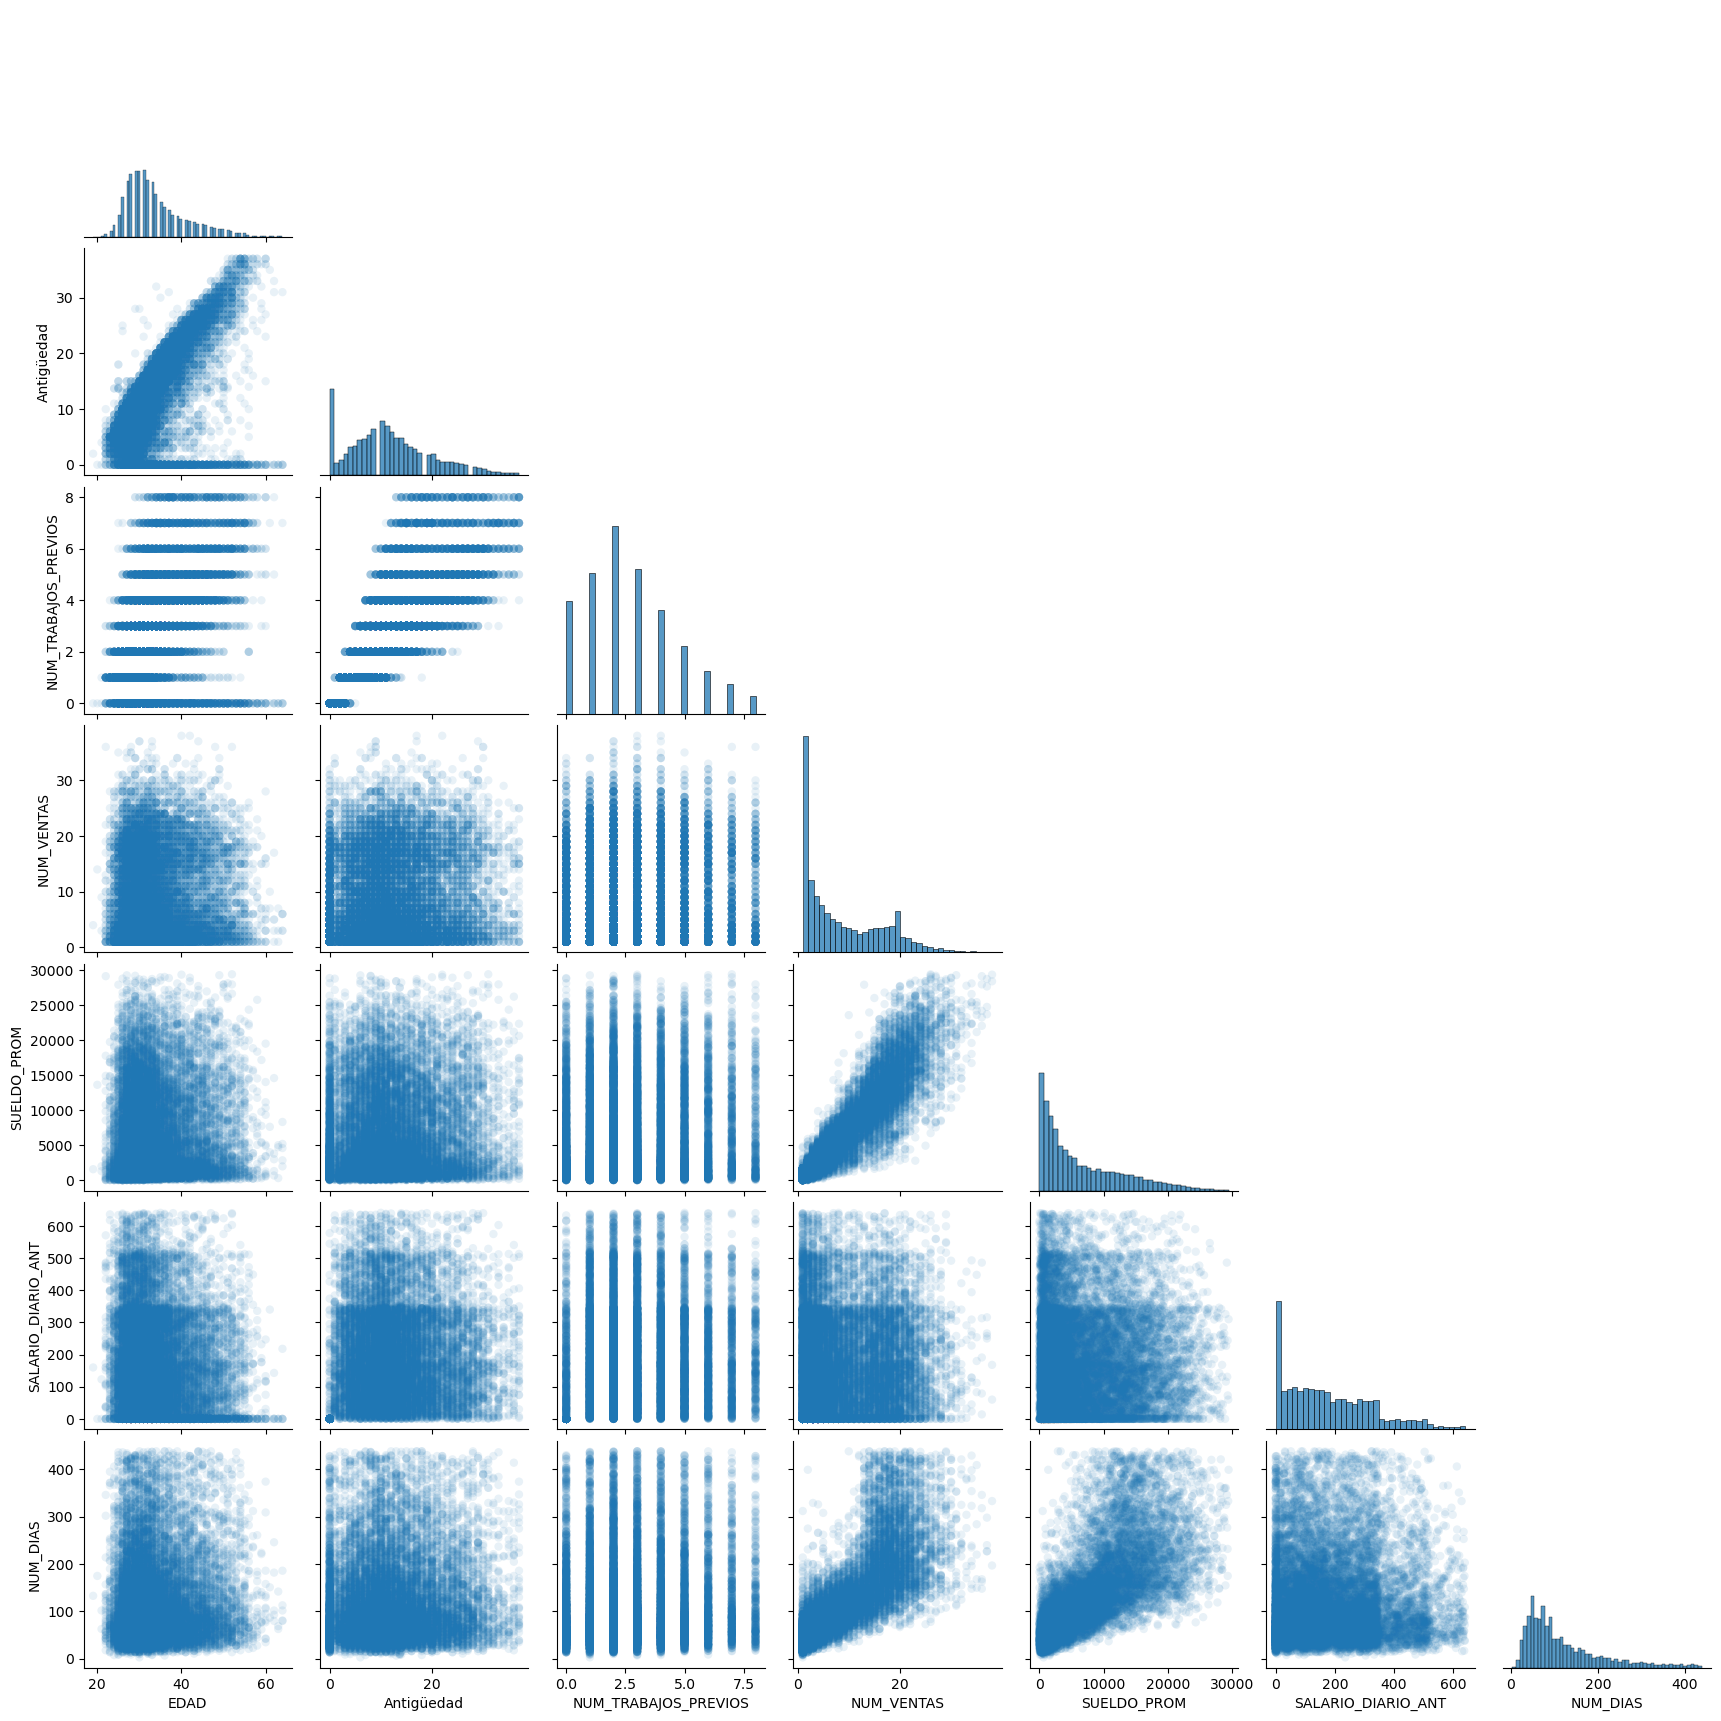

In [ ]:
sns.pairplot(merged_df, plot_kws=dict(alpha=0.1, edgecolor='none'), corner=True)

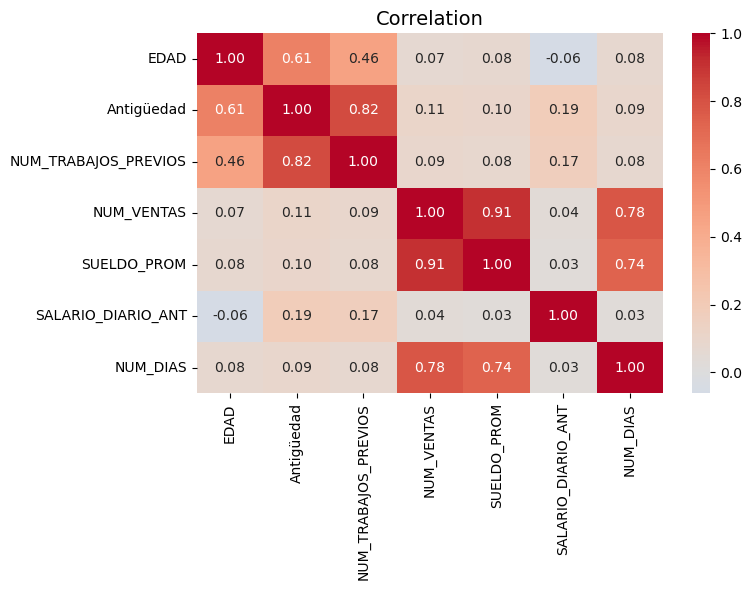

In [ ]:
# Numerical columns
numerical_cols = ['EDAD', 'Antigüedad', 'NUM_TRABAJOS_PREVIOS', 'NUM_VENTAS', 'SUELDO_PROM', 'SALARIO_DIARIO_ANT', 'NUM_DIAS']

# Compute correlation matrix
corr_matrix = merged_df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation", fontsize=14)

plt.tight_layout()
plt.show()

#### **Insights**
- Antigüedad is correlated with EDAD and NUM_TRABAJOS_PREVIOS, this is expected
- Antigüedad is not correlated with NUM_VENTAS
- NUM_VENTAS is highly correlated to SUELDO_PROM and NUM_DIAS, this is also expected.
- NUM_VENTAS is not correlated to EDAD
-NUM_VENTAS is correlated to NUM_DIAS, this is expected

#### Let us now see the correlation of numerical variables by RENUNCIO

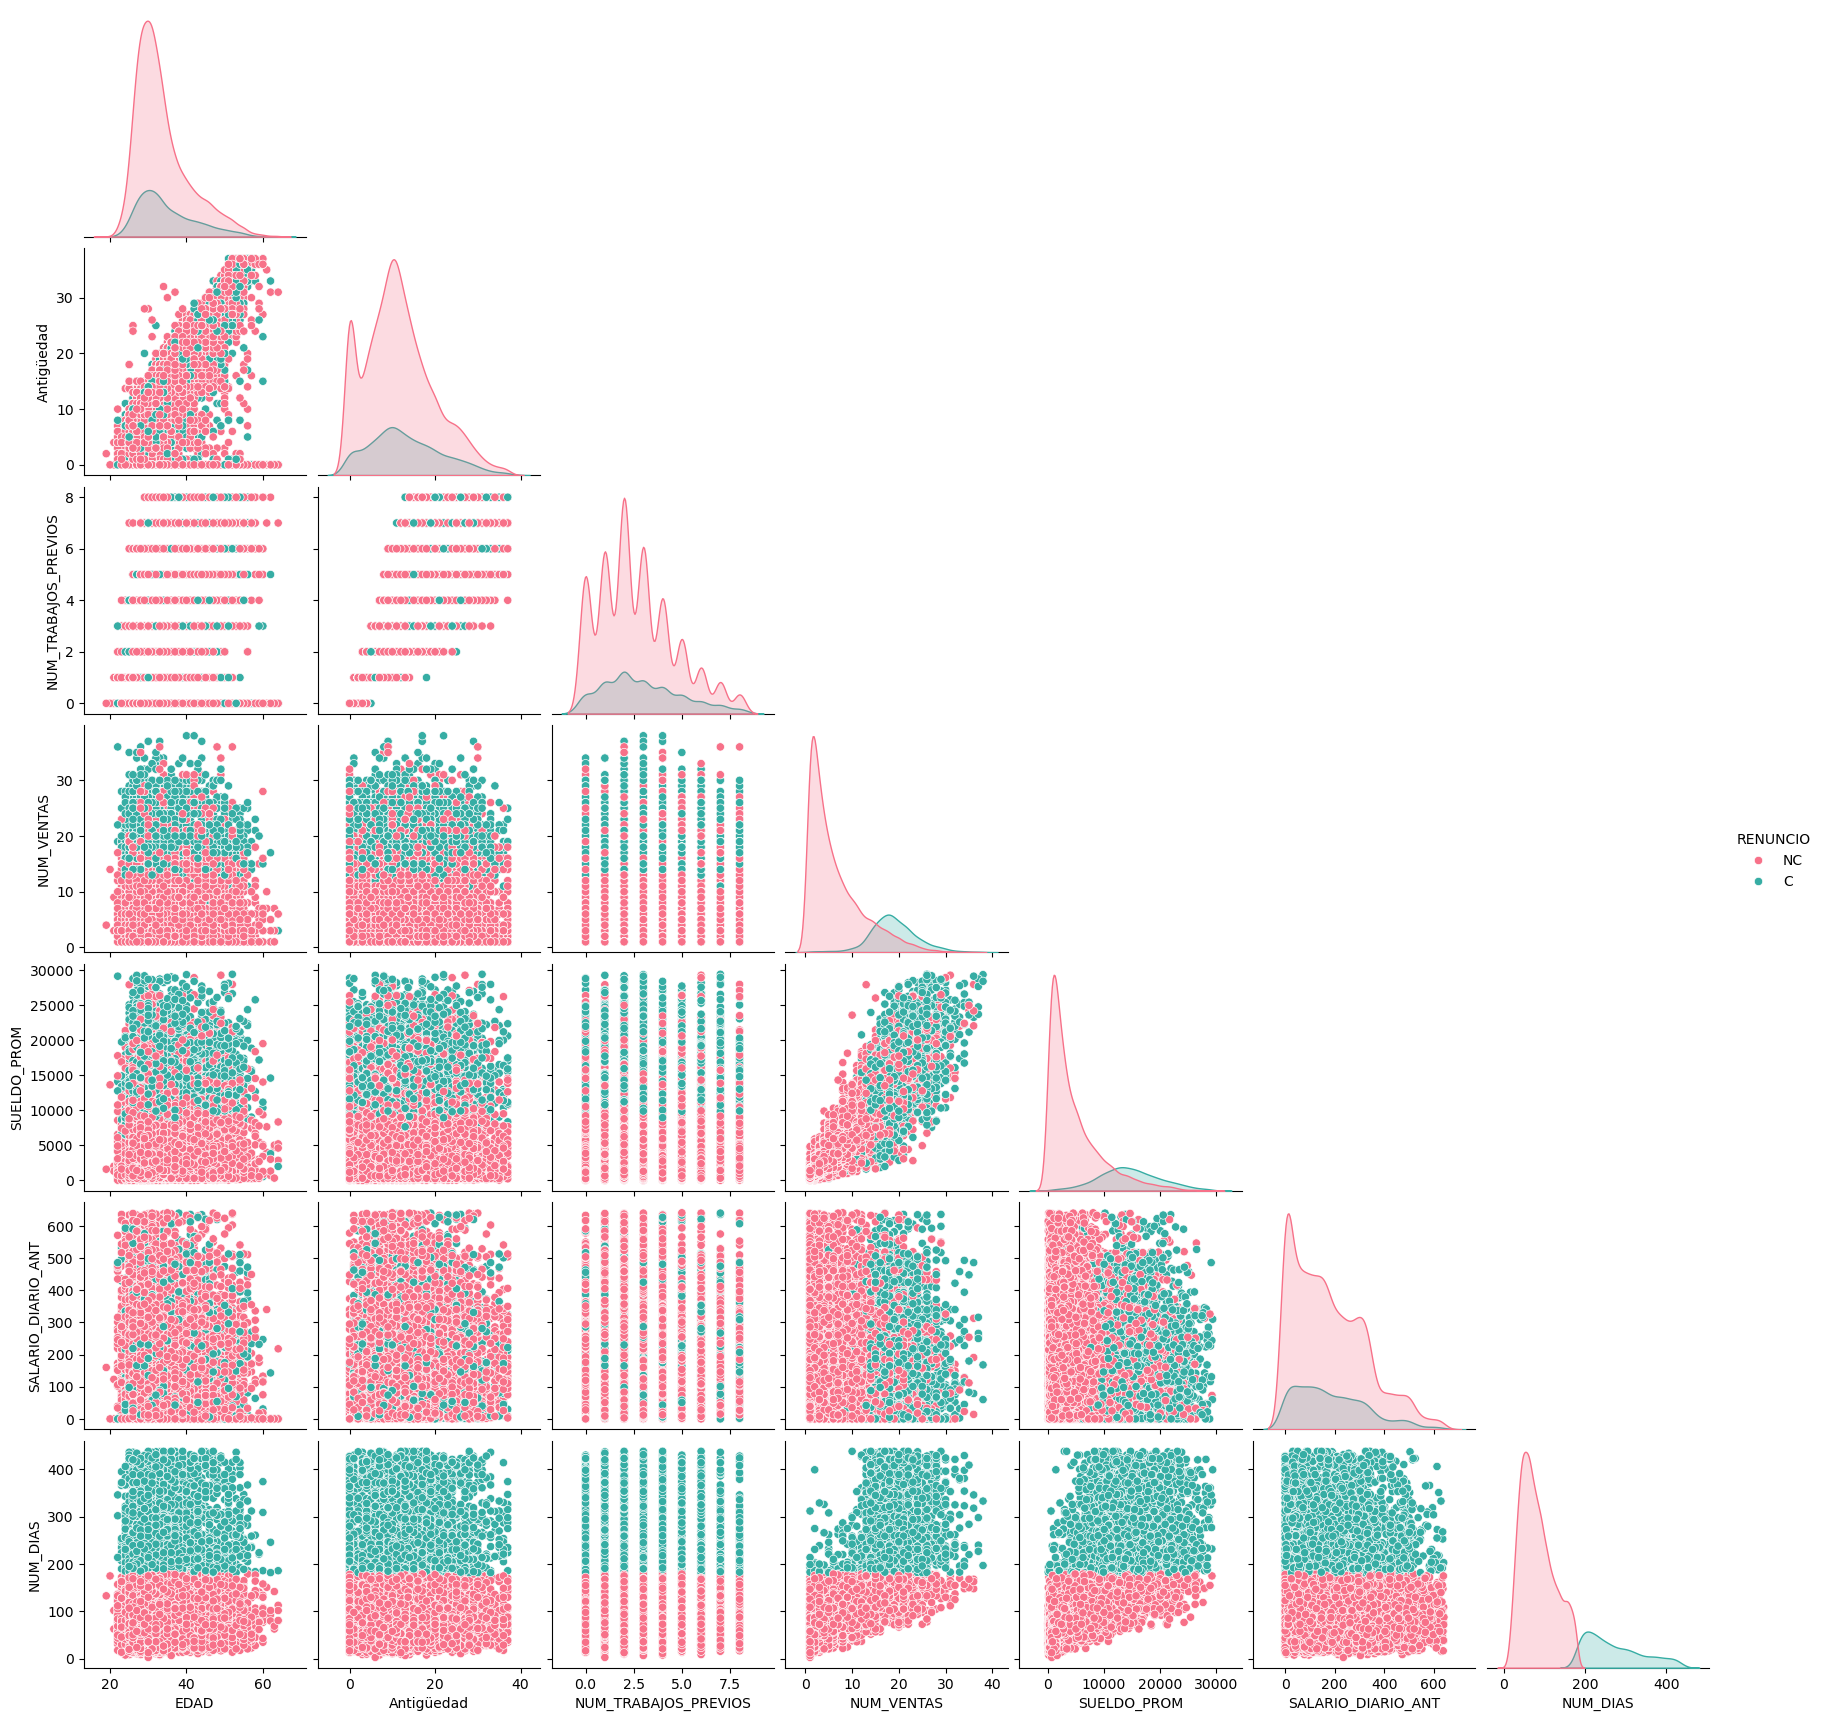

In [ ]:
sns.pairplot(merged_df, hue = 'RENUNCIO', palette = 'husl', corner=True)

#### **Insights**:
- As we saw previously, NUM_VENTAS is not correlated to EDAD.
- Also, NUM_VENTAS is not correlated to Antigüedad.
- We can see that RENUNCIO tends to be on the lower side of NUM_VENTAS.

---
## 6) Further Analysis

#### Are sales and resignation rate correlated to genre?

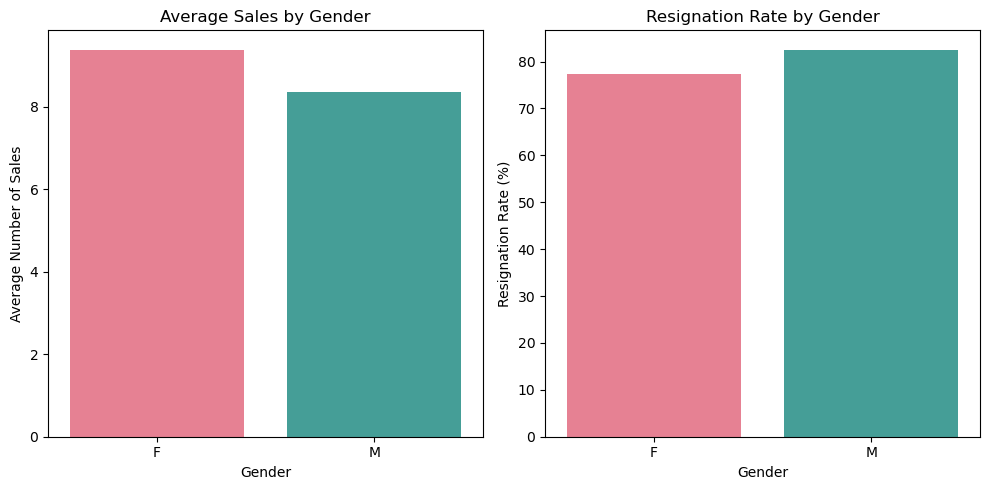

In [ ]:
plt.figure(figsize=(10, 5))

# --- Plot 1: Average Sales by Gender ---
plt.subplot(1, 2, 1)
sns.barplot(
    data=merged_df,
    x='GENERO',
    y='NUM_VENTAS',
    estimator='mean',
    ci=None,
    palette='husl'
)
plt.title('Average Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Sales')

# --- Plot 2: Resignation Rate by Gender ---
plt.subplot(1, 2, 2)

# Calculate resignation counts (NC = Quit, C = Stayed)
resignation_counts = merged_df[merged_df['RENUNCIO'] == 'NC'].groupby('GENERO').size()
total_counts = merged_df.groupby('GENERO').size()
resignation_rate = (resignation_counts / total_counts * 100).reset_index(name='resignation Rate')

sns.barplot(
    data=resignation_rate,
    x='GENERO',
    y='resignation Rate',
    palette='husl'
)
plt.title('Resignation Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Resignation Rate (%)')

# Adjust layout and display
plt.tight_layout()
plt.show()

#### **Insights**:
- Women do in average more sales that men.
- Men are more likely to quit.

#### Is Age Correlated to Sales? Also, let us see the percentage of people on each age range

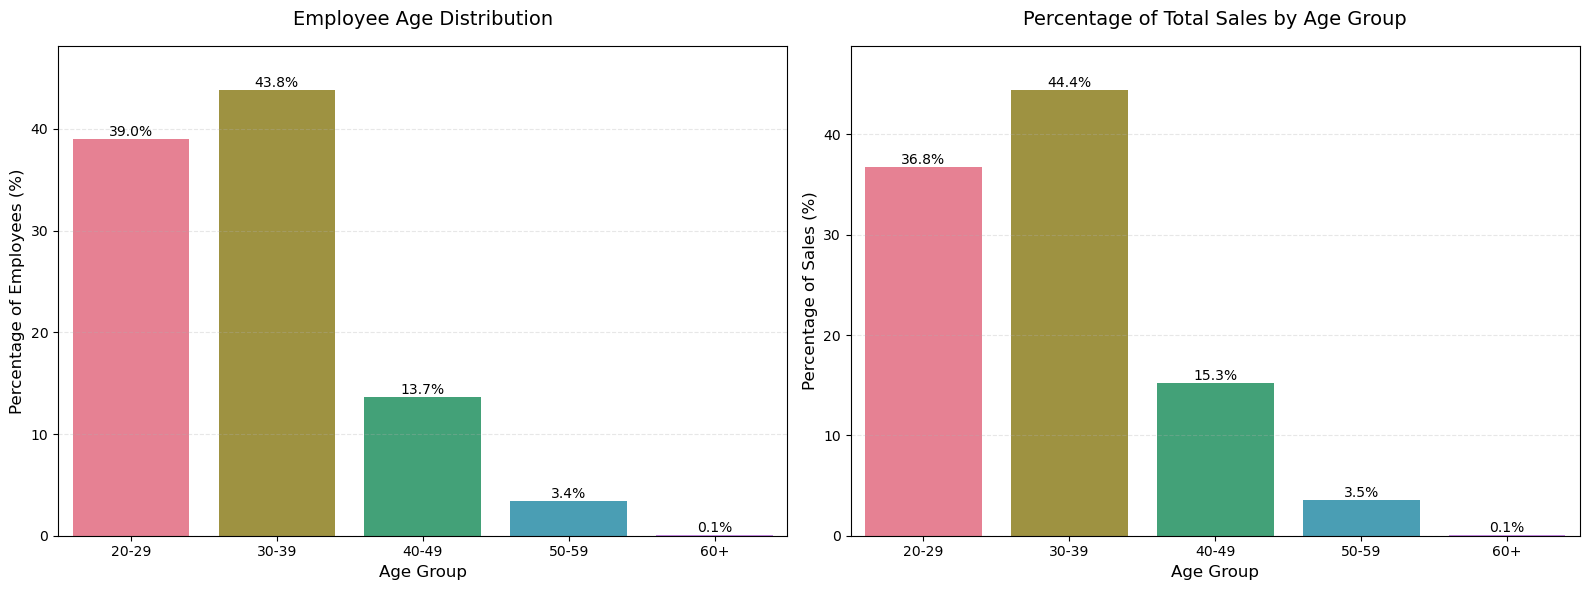

In [ ]:
# Create age groups
merged_df['AGE_GROUP'] = pd.cut(merged_df['EDAD'],
                               bins=[20, 30, 40, 50, 60, 100],
                               labels=['20-29', '30-39', '40-49', '50-59', '60+'])

# Calculate percentage per age group
age_dist = merged_df['AGE_GROUP'].value_counts(normalize=True).sort_index() * 100
age_dist = age_dist.reset_index()
age_dist.columns = ['AGE_GROUP', 'PERCENTAGE']

plt.figure(figsize=(16, 6))

# --- Plot 1: Employee Age Distribution ---
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot

# Plot age distribution
ax1 = sns.barplot(
    x='AGE_GROUP',
    y='PERCENTAGE',
    data=age_dist,
    palette='husl',
    order=['20-29', '30-39', '40-49', '50-59', '60+']
)

plt.title('Employee Age Distribution', fontsize=14, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage of Employees (%)', fontsize=12)

# Add percentage labels
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.ylim(0, age_dist['PERCENTAGE'].max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# --- Plot 2: Sales Percentage by Age Group ---
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot

# Calculate total sales per age group
sales_per_age = merged_df.groupby('AGE_GROUP')['NUM_VENTAS'].sum().reset_index(name='TOTAL_SALES')
sales_per_age['PCT_SALES'] = (sales_per_age['TOTAL_SALES'] / sales_per_age['TOTAL_SALES'].sum()) * 100

# Plot sales distribution
ax2 = sns.barplot(
    data=sales_per_age,
    x='AGE_GROUP',
    y='PCT_SALES',
    palette='husl',
    order=['20-29', '30-39', '40-49', '50-59', '60+']
)

plt.title('Percentage of Total Sales by Age Group', fontsize=14, pad=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Percentage of Sales (%)', fontsize=12)

# Add percentage labels
for p in ax2.patches:
    ax2.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.ylim(0, sales_per_age['PCT_SALES'].max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### **Insights**:
- Young promoters (20-40 years) do most of the sales.
- That is because they are also the biggest group.

#### Is age related to quitting?

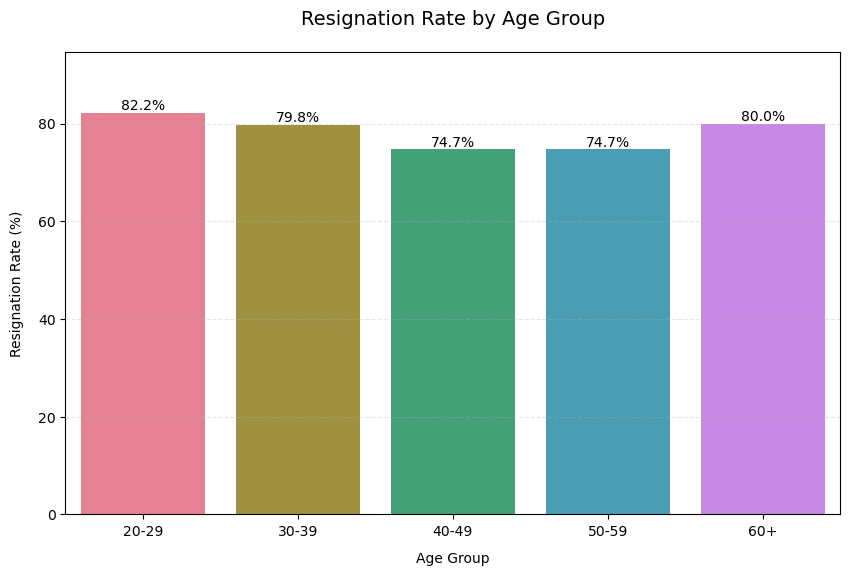

In [ ]:
# Calculate resignation rate per group
resignation_rate = merged_df.groupby('AGE_GROUP')['RENUNCIO'] \
                  .apply(lambda x: (x == 'NC').mean() * 100) \
                  .reset_index(name='ATTRITION_RATE')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=resignation_rate,
    x='AGE_GROUP',
    y='ATTRITION_RATE',
    palette='husl'
)

plt.title('Resignation Rate by Age Group', fontsize=14, pad=20)
plt.xlabel('Age Group', labelpad=10)
plt.ylabel('Resignation Rate (%)', labelpad=10)
plt.ylim(0, resignation_rate['ATTRITION_RATE'].max() * 1.15)

# Add percentage labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

#### **Insights**:
- Young promoters are also the ones that quit more. Still, the difference is small.

#### Is experience related to sells?

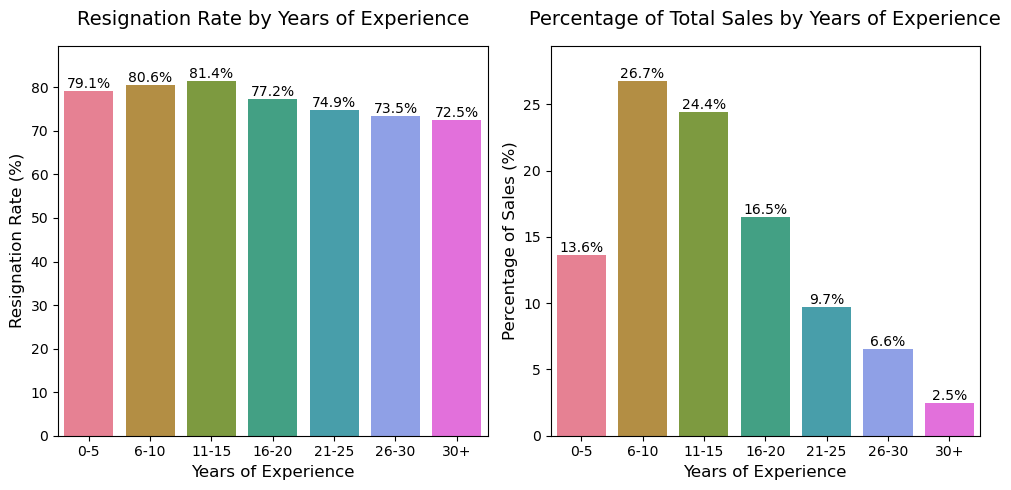

In [ ]:
# Bin tenure into groups
tenure_bins = [0, 5, 10, 15, 20, 25, 30, 50]
tenure_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']
merged_df['TENURE_GROUP'] = pd.cut(merged_df['Antigüedad'], bins=tenure_bins, labels=tenure_labels)

# Calculate resignation rate per tenure group
resignation_rate = merged_df.groupby('TENURE_GROUP')['RENUNCIO'] \
                         .apply(lambda x: (x == 'NC').mean()* 100) \
                         .reset_index(name='resignation_RATE')

# Calculate percentage of total sales per tenure group
sales_per_tenure = merged_df.groupby('TENURE_GROUP')['NUM_VENTAS'].sum().reset_index(name='TOTAL_SALES')
sales_per_tenure['PCT_SALES'] = (sales_per_tenure['TOTAL_SALES'] / sales_per_tenure['TOTAL_SALES'].sum()) * 100


plt.figure(figsize=(10, 5))

# --- Plot 1: Resignation Rate by Tenure ---
plt.subplot(1, 2, 1)
ax1 = sns.barplot(
    data=resignation_rate,
    x='TENURE_GROUP',
    y='resignation_RATE',
    palette='husl',
    order=tenure_labels
)
plt.title('Resignation Rate by Years of Experience', fontsize=14, pad=15)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Resignation Rate (%)', fontsize=12)
plt.ylim(0, resignation_rate['resignation_RATE'].max() * 1.1)

# Add value labels
for p in ax1.patches:
    ax1.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

# --- Plot 2: Percentage of Sales by Tenure ---
plt.subplot(1, 2, 2)
ax2 = sns.barplot(
    data=sales_per_tenure,
    x='TENURE_GROUP',
    y='PCT_SALES',
    palette='husl',
    order=tenure_labels
)
plt.title('Percentage of Total Sales by Years of Experience', fontsize=14, pad=15)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Percentage of Sales (%)', fontsize=12)
plt.ylim(0, sales_per_tenure['PCT_SALES'].max() * 1.1)

# Add value labels
for p in ax2.patches:
    ax2.annotate(
        f"{p.get_height():.1f}%",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

#### **Insights**:
- The resignation rate again is higher in the low experience.
- Again, sales promoters sell more in the mid-low years of experience.

#### Are good promoters leaving?

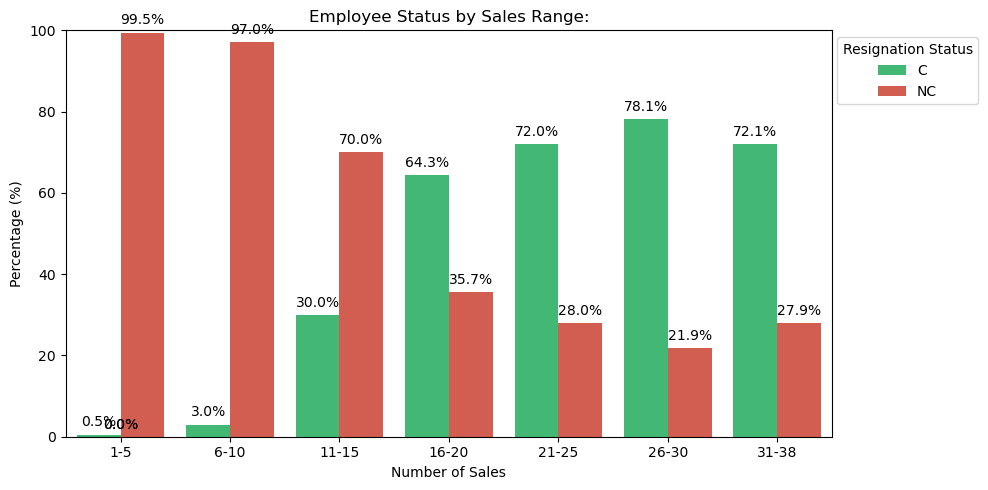

In [ ]:
# First, remove the existing SALES_RANGE column if it exists
if 'SALES_RANGE' in merged_df.columns:
    merged_df = merged_df.drop(columns=['SALES_RANGE'])

# Bin sales into ranges (1-38)
sales_bins = [1, 5, 10, 15, 20, 25, 30, 38]
sales_labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-38']
merged_df['SALES_RANGE'] = pd.cut(merged_df['NUM_VENTAS'],
                                 bins=sales_bins,
                                 labels=sales_labels,
                                 include_lowest=True)

# Calculate percentages
pct_data = (
    merged_df.groupby(['SALES_RANGE', 'RENUNCIO'])
    .size()
    .unstack()
    .apply(lambda x: 100 * x / x.sum(), axis=1)
    .stack()
    .reset_index(name='PERCENTAGE')
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=pct_data,
    x='SALES_RANGE',
    y='PERCENTAGE',
    hue='RENUNCIO',
    palette={'NC': '#e74c3c', 'C': '#2ecc71'},
    order=sales_labels
)

plt.title('Employee Status by Sales Range:')
plt.xlabel('Number of Sales')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add percentage labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2.,
        height + 2,
        f'{height:.1f}%',
        ha='center'
    )

plt.legend(title='Resignation Status', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

#### **Insights**:
- Sales promoters with low sales are more likely to quit.
- Sales promoters in the middle range are less likely to quit.
- There is a rebound of the resignation rate on the top promoters.

#### Export the merged data for further analysis with machine learning methods

In [82]:
# Save the merged DataFrame to a CSV file
output_path = ROOT_DIR / "data" / "processed" / "merged_df.csv"
merged_df.to_csv(output_path, index=False)

---

## 6) Conclusions


- Sales promoters that resigned, strugled with making sales and resulted in low salaries.
- Young sales promoters in the range of (20-40) years do most of the sales.
- Good promoters are not determined by older age nor prior experience.
- There is a spike on top promoters that resign, likely to better work offers.

### **Recomendations**:
1. For Low Performers (1-10 Sales)
  - Implement a mentorship program with top performers and improve the induction course.
  - Guaranteed base pay for the first 3 months to reduce financial stress.

2. For High Performers (21+ Sales)
    - Leadership training to prepare for management roles.
    - Stretch goals with bonuses.
    - Training to diversify skills and maintain engagement.
    - Mentor role with extra bonuses based on performance.